### Load Dataset 

In [1]:
# Import the library that might be used in this project
from pandas import read_csv
from numpy import set_printoptions
from scipy import stats
from numpy import nan
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import os, glob
import statistics
from reliability.Fitters import Fit_Everything
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

In [2]:
# load the dataset by using pandas as read csv
df = pd.read_csv('D:/download/new_model.csv', header = 0)

In [3]:
# Check the dimensional of this collected dataset
print("The dimensional of this collected dataset is : ", df.shape)

The dimensional of this collected dataset is :  (400, 14)


As the result displayed the collected dataset has 400 rows of records and it is consisted by 14 attributes.

In [4]:
# Display the first five roles from this colleceted dataset for checking the dataframe
df.head(5)

Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4  80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  Class  
0  1.0      1  
1  0.0      1  
2  0.0      1  
3  1.0      1  
4  0.0      1

### Data Pre-Processing

In [5]:
# Replace the missing value with NaN by using numpy
df[['Bp','Sg','Al','Su','Rbc','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc','Htn','Class']] = df[['Bp','Sg','Al','Su','Rbc','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc','Htn','Class']].replace(' ', np.nan)
# Checking the collected dataset has missing value or not
print(df.isnull().sum())

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


Missing values can cause problems in the data analytics process since it is impossible to identify the problem and make predictions without enough data. If a dataset has a large number of missing values, the resulting prediction result may be statistically insignificant due to the little amount of data. There are a few options for dealing with missing values in a dataset. First, if the number of missing values for a feature exceeds 25% of the total samples, the feature must be dropped from the collected dataset by using the drop function since there are so many samples that need to be replaced.

Since our group utilised Numpy's feature to convert missing values to 'NaN' in order to detect any missing values in the gathered dataset, As seen in the results above, the gathered dataset has no missing values, indicating that it is a very clean dataset that can save time when dealing with missing values.

#### Data Transformation

In [6]:
# Find the categorical column and separate it out with a different dataframe
df_categorical = df.select_dtypes(exclude=[np.number])
df_categorical

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[400 rows x 0 columns]

As the result displays above, after checking the collected dataset, it does not have any non-numerical classification data type, so it does not require to execute the process of data transformation in this project. 

#### Data Selection

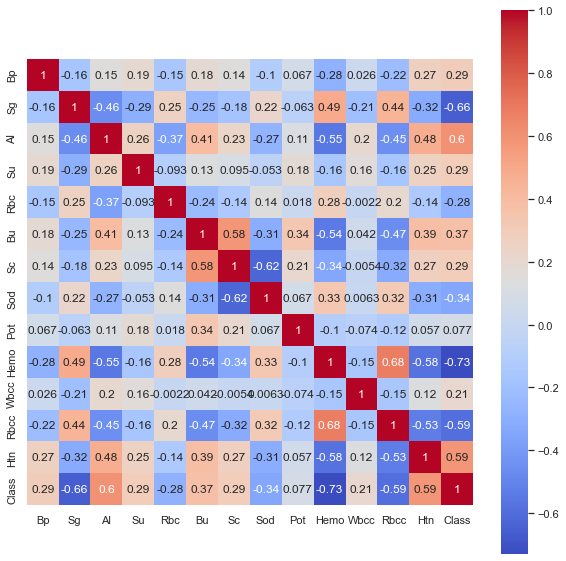

In [7]:
# Print the correlation graph
# Find the pairwise correlation of all features in the dataFrame
dfData = df.corr()
# Set the graph's size
plt.subplots(figsize=(10, 10)) 
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap= 'coolwarm')
plt.show()

The correlation graph shown above may be used to see the relationship between each feature (column). The feature named Class (which is a dependent property that may be regarded as which patient has been discovered to have chronic kidney disease) has a strong correlation with other features, as seen in the graph (Sg, Al, Pot, Hemo, Rbcc, Htn). As a consequence, we can determine what type of body health index causes a patient to get chronic kidney disease.

#### One Way ANOVA for Feature Selection to the Numeric Features

In [8]:
# Store all the continuous features 
testing = ['Bp','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc']
y = df['Class']
x = df[testing]
# Spliting the data into train and test dataset before executing the One Way ANOVA feature selection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# Select the top 3 best features from the continuous features
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
selector = SelectKBest(f_classif, k =3)
selector.fit(x_train, y_train)

SelectKBest(k=3)

In [10]:
# Display the index from the array
cols = selector.get_support(indices=True)
cols

array([1, 5, 7], dtype=int64)

As the result show the top 3 continuous data type features are Hemo, Rbcc, and Bu

In [11]:
# make a dataframe of features and p-values and the f score
# sort that dataframe by p-value
selection_board = pd.DataFrame({'column': x.columns, 'p_value': selector.pvalues_,'f-scores': selector.scores_ }).sort_values('p_value')
# show the top 8 features
selection_board.head(8)

column       p_value    f-scores
5   Hemo  2.284611e-53  351.711147
7   Rbcc  4.552230e-29  153.740255
1     Bu  1.675485e-10   43.619556
3    Sod  4.946307e-09   36.177826
2     Sc  3.890306e-07   26.862736
0     Bp  4.778464e-07   26.432060
6   Wbcc  1.138702e-04   15.270225
4    Pot  1.587122e-01    1.995815

Because our group has done some study on the value is more approach with zero may be viewed as more linked to the dependent attribute and the One Way ANOVA feature selection is utilising the f-scores to choose the attributes as well, the top three continuous features are Hemo, Rbcc, and Bu. Because our group had referred to the correlation matrix above and found that their correlation score had a significant association with the dependent characteristic, they only chose the three highest f-scores (Class). As a result, just three attributes from the continuous data type were chosen by our group.

#### Chi Square for Feature Selection to the Categorical Features

In [12]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [13]:
#implement Chi squared test for the original dataframe for comparison
def chi2_test(df, feat1, feat2):
    
    contingency_table = pd.crosstab(df[feat1], df[feat2])
    stat, p, dof, expected = chi2_contingency(contingency_table)
    prob = 0.95 # alpha=0.05
    critical = chi2.ppf(prob, dof)
    
    # interpret p-value
    alpha = 1.0 - prob
    
    #print('alpha=%.3f, critical_value=%.3f,\nstat=%.3f' % (1 - prob, critical, stat))
    
    return stat, p

In [14]:
categorical_features = ["Sg","Al","Su","Rbc","Htn"]

df2 = df.astype(int)

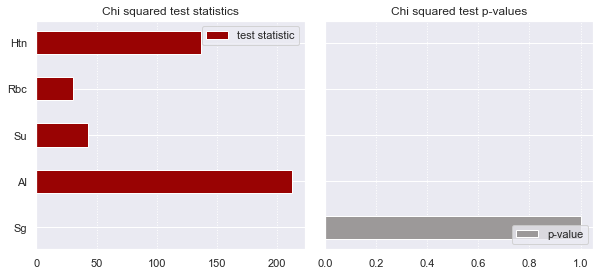

In [15]:
#plotting graph for both chi squared test to select the features
stats = []
p_values = []

for feat in categorical_features:
        
    stat, p = chi2_test(df2, feat, "Class")
    stats.append(stat)
    p_values.append(p)

fig, axes = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(8.5, 4)
axes[0].barh(y=categorical_features, width=stats, color="#990303", label="test statistic", height=0.5)
axes[0].set_title("Chi squared test statistics")

axes[1].barh(y=categorical_features, width=p_values, color="#9C9999", label="p-value", height=0.5)
axes[1].set_title("Chi squared test p-values")

axes[0].xaxis.grid(True, linestyle=':');
axes[1].xaxis.grid(True, linestyle=':');

axes[0].legend(loc=1)
axes[1].legend(loc=4)

fig.subplots_adjust(wspace=0.06)
plt.tight_layout()

###### Drop non-correlation Features after Executing ANOVA and Chi-Square

In [16]:
# Drop the unwanted and non-correlation features from the imported dataframe
df.drop(columns = ["Sg","Pot","Wbcc","Bp","Sc","Sod"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      400 non-null    float64
 1   Su      400 non-null    float64
 2   Rbc     400 non-null    float64
 3   Bu      400 non-null    float64
 4   Hemo    400 non-null    float64
 5   Rbcc    400 non-null    float64
 6   Htn     400 non-null    float64
 7   Class   400 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 25.1 KB


###### Remove Outlier Data

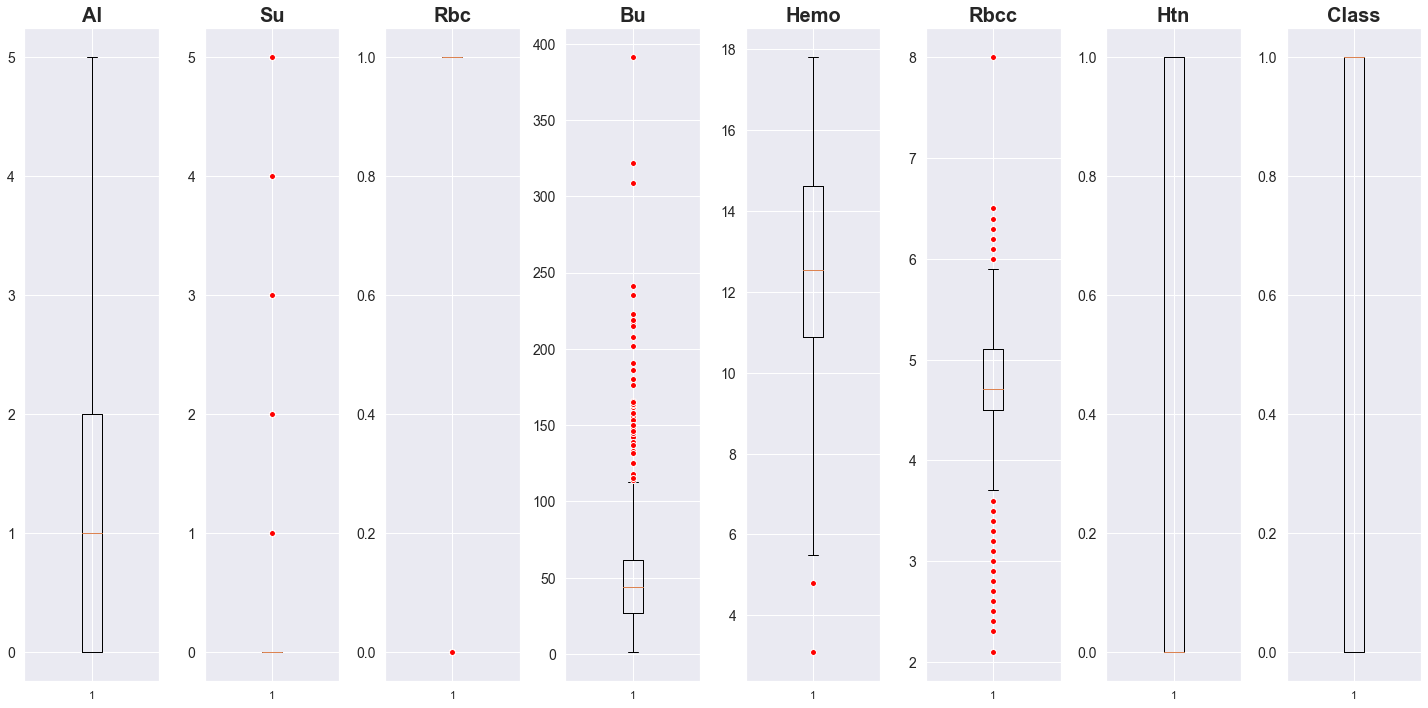

In [17]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

Following plotting the boxplot for each characteristic as shown above, our group utilised the boxplot to see if the gathered dataset contained any outlier data after the data selection procedure. As a result, the boxplot's red dots represent outlier data. Our group, on the other hand, will only remove the outlier data from the Bu and Rbcc since the other outlier data shown in the boxplot is categorical data and so cannot be eliminated from the dataset.

In [18]:
# Check the 1st and 3rd quantile of the feature of the Bu
Q1 = df.Bu.quantile(0.25)
Q3 = df.Bu.quantile(0.75)
Q1,Q3
# Get the IQR
IQR = Q3 - Q1
IQR
# Get the lower limit and upper limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
# Remove the outlier data of the Bu
df = df[(df.Bu>lower_limit)&(df.Bu<upper_limit)]
df.shape

(359, 8)

In [19]:
# Check the 1st and 3rd quantile of the feature of the Rbcc
Q1 = df.Rbcc.quantile(0.25)
Q3 = df.Rbcc.quantile(0.75)
Q1,Q3
# Get the IQR
IQR = Q3 - Q1
IQR
# Get the lower limit and upper limit
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
# Remove the outlier data of the Rbcc
df = df[(df.Rbcc>lower_limit)&(df.Rbcc<upper_limit)]
df.shape

(317, 8)

There are only 317 records (rows) and 8 columns left after eliminating outlier data from the dataset (features include dependent attribute). Finally, the data preparation procedure has been completed, and this dataset is now ready to be used in Machine Learning algorithms and data exploration.

### Data Exploratory

In [20]:
# Check the type of this data preprocessed dataframe
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [21]:
# Checking the information and datatype of each attributes in this data preprocessed dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 399
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      317 non-null    float64
 1   Su      317 non-null    float64
 2   Rbc     317 non-null    float64
 3   Bu      317 non-null    float64
 4   Hemo    317 non-null    float64
 5   Rbcc    317 non-null    float64
 6   Htn     317 non-null    float64
 7   Class   317 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 22.3 KB


In [22]:
# Print the statistical index of the data
df.describe()

Al          Su         Rbc          Bu        Hemo        Rbcc  \
count  317.000000  317.000000  317.000000  317.000000  317.000000  317.000000   
mean     0.858044    0.372240    0.902208   42.499054   13.040032    4.835647   
std      1.167346    1.037395    0.297503   21.661848    2.385054    0.532130   
min      0.000000    0.000000    0.000000    1.500000    4.800000    3.700000   
25%      0.000000    0.000000    1.000000   26.000000   11.500000    4.700000   
50%      0.000000    0.000000    1.000000   39.000000   12.600000    4.710000   
75%      1.000000    0.000000    1.000000   53.000000   15.000000    5.100000   
max      4.000000    5.000000    1.000000  113.000000   17.800000    6.100000   

              Htn       Class  
count  317.000000  317.000000  
mean     0.298864    0.586751  
std      0.456872    0.493195  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    1.000000  
max      1.000000    1.000000

In [23]:
# Print the statistical index of the data and transpose the matrices
df.describe().T

count       mean        std  min   25%    50%   75%    max
Al     317.0   0.858044   1.167346  0.0   0.0   0.00   1.0    4.0
Su     317.0   0.372240   1.037395  0.0   0.0   0.00   0.0    5.0
Rbc    317.0   0.902208   0.297503  0.0   1.0   1.00   1.0    1.0
Bu     317.0  42.499054  21.661848  1.5  26.0  39.00  53.0  113.0
Hemo   317.0  13.040032   2.385054  4.8  11.5  12.60  15.0   17.8
Rbcc   317.0   4.835647   0.532130  3.7   4.7   4.71   5.1    6.1
Htn    317.0   0.298864   0.456872  0.0   0.0   0.00   1.0    1.0
Class  317.0   0.586751   0.493195  0.0   0.0   1.00   1.0    1.0

In [24]:
# Get the median of each features (columns) in the dataframe which is called 'df'
print("The median of Al : ",statistics.median(df['Al']))
print("The median of Su : ",statistics.median(df['Su']))
print("The median of Rbc : ",statistics.median(df['Rbc']))
print("The median of Bu : ",statistics.median(df['Bu']))
print("The median of Hemo : ",statistics.median(df['Hemo']))
print("The median of Rbcc : ",statistics.median(df['Rbcc']))
print("The median of Htn : ",statistics.median(df['Htn']))

The median of Al :  0.0
The median of Su :  0.0
The median of Rbc :  1.0
The median of Bu :  39.0
The median of Hemo :  12.6
The median of Rbcc :  4.71
The median of Htn :  0.0


In [25]:
# Get the mode of each features (columns) in the dataframe which is called 'df'
print("The mode of Al : ",statistics.mode(df['Al']))
print("The mode of Su : ",statistics.mode(df['Su']))
print("The mode of Rbc : ",statistics.mode(df['Rbc']))
print("The mode of Bu : ",statistics.mode(df['Bu']))
print("The mode of Hemo : ",statistics.mode(df['Hemo']))
print("The mode of Rbcc : ",statistics.mode(df['Rbcc']))
print("The mode of Htn : ",statistics.mode(df['Htn']))

The mode of Al :  0.0
The mode of Su :  0.0
The mode of Rbc :  1.0
The mode of Bu :  57.0
The mode of Hemo :  12.53
The mode of Rbcc :  4.71
The mode of Htn :  0.0


                    Alpha       Beta     Gamma         Mu     Sigma    Lambda         AICc          BIC
Distribution                                                                                           
Weibull_2P      14.015732   6.267295                                           1450.732866  1458.212453
Normal_2P                                       13.040032  2.381289            1453.730301  1461.209888
Weibull_3P      12.414358    5.51296  1.574068                                 1452.302215  1463.502243
Gamma_2P         0.477112  27.331185                                           1475.324078  1482.803665
Gamma_3P         0.325309  53.732311 -4.439578                                 1477.823138  1489.023166
Lognormal_2P                                     2.549618  0.198173            1493.901857  1501.381444
Lognormal_3P                          1.333324   2.436761  0.225543            1506.409163  1501.381444
Exponential_2P                           4.799                  

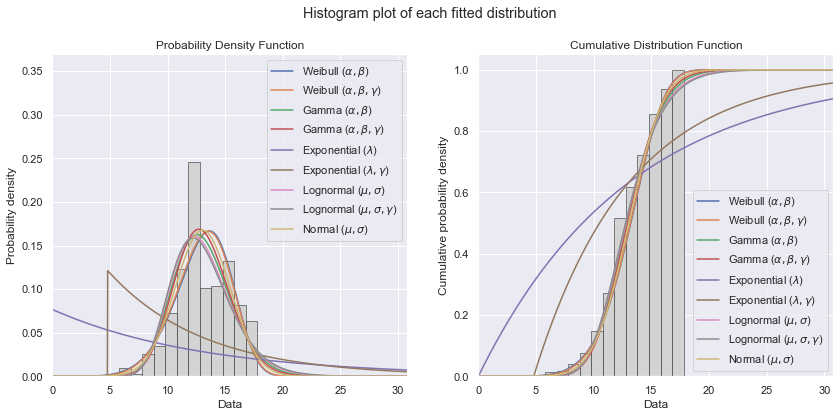

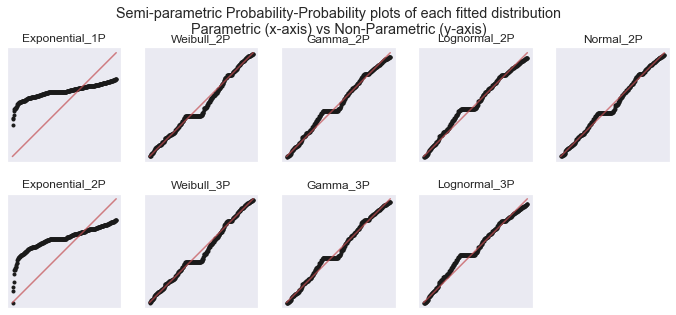

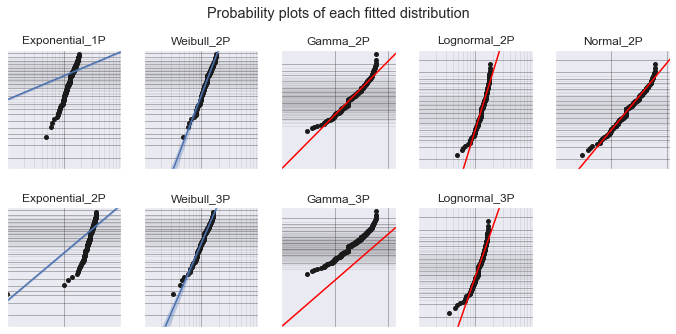

In [26]:
# Identify the distribution and fitting all distribution to the Hemo feature
Fit_Everything(failures=np.array(df['Hemo']), show_histogram_plot=True, show_probability_plot=True, show_PP_plot=True)
plt.show()

Value of AIC and BIC is the most important part when there are finding the most approriate distribution. The lower the value of AICc and BIC, and the better fit of the data. There has shown at the above table, the distibution of Weibull_2P Distribution has the lowest AICc and BIC.

Based on the information above, the smallest AICc is  1450.732866 and the smallest BIC is 1458.212453. Weibull_2P Distribution has the best fit graph where all the plot are closest to the red line.

Therefore, the best fit distribution is Weibull_2P Distribution for the feature of Hemo (Hemoglobin).

<AxesSubplot:>

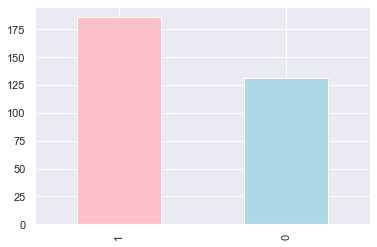

In [27]:
# Plot the graph about count the amount of detected kidney disease in this dataframe
df['Class'].value_counts().plot(kind="bar", color=["pink", "lightblue"])

Based on the bar graph above, it shows the total number of the patient who had been detected have the chronic kidney disease in this collected dataset. As the result shows, there has shown 187 patients who had been detected have the chronic kidney disease and 131 patients who had not been detected have the chronic kidney disease and have a healthy body.

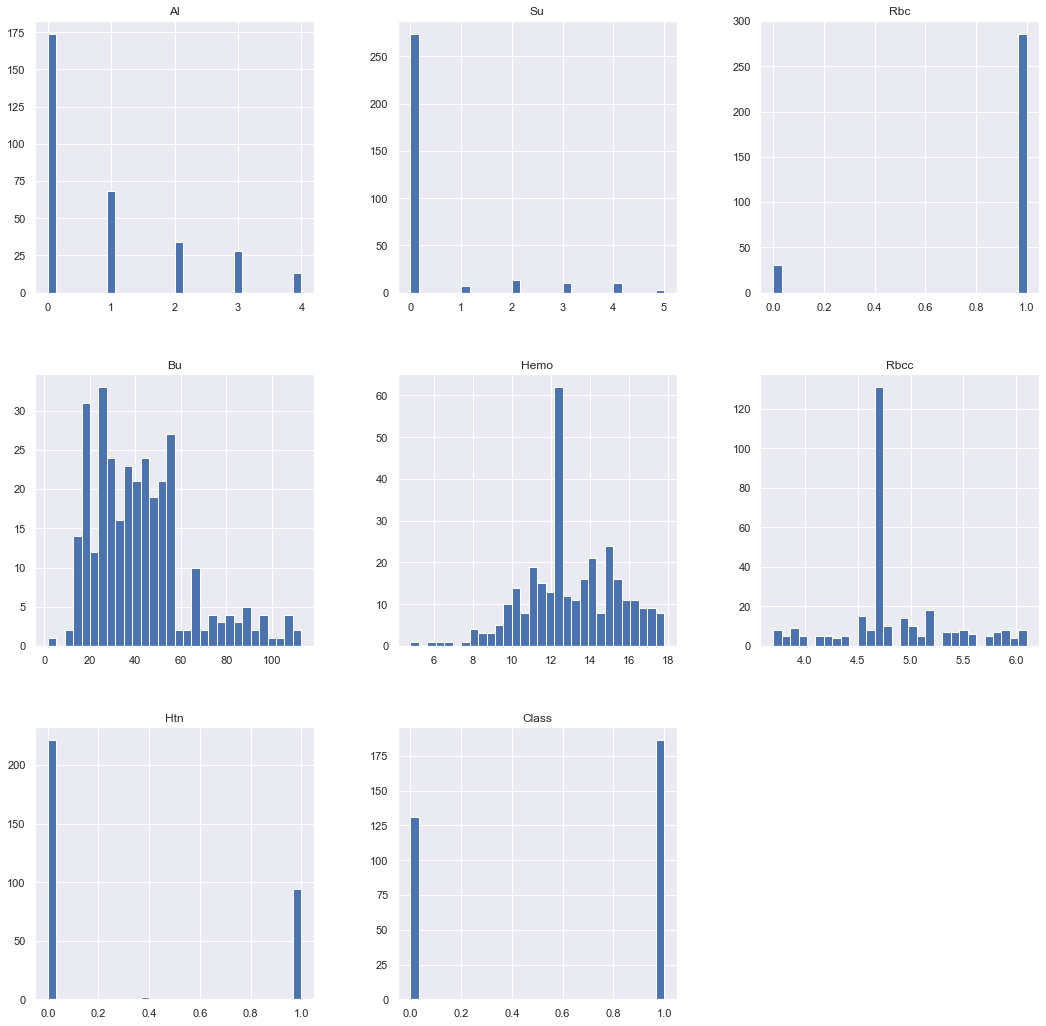

In [28]:
# Plotting the histogram graph for all the features in the dataframe
# Get the frequency of each column (feature)
fig = plt.figure(figsize = (18,18))
ax = fig.gca()
# Set the bins as 30 in each histogram graph
df.hist(ax=ax,bins = 30)
plt.show()

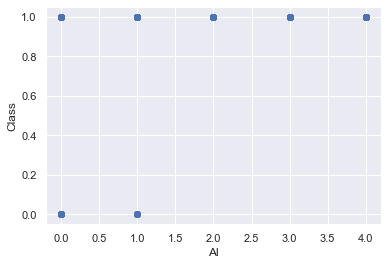

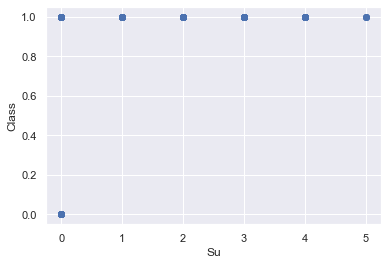

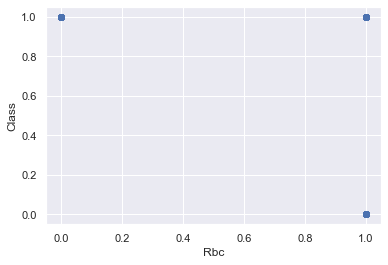

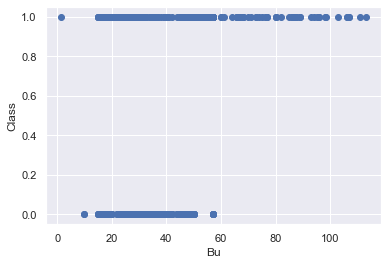

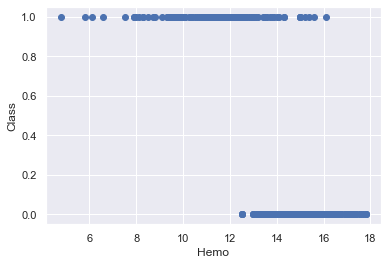

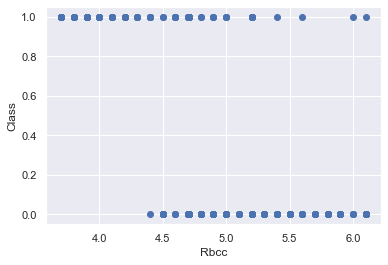

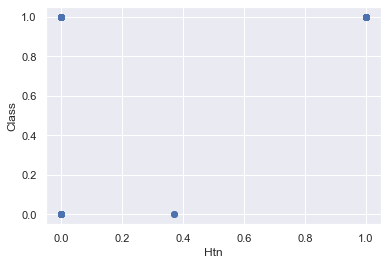

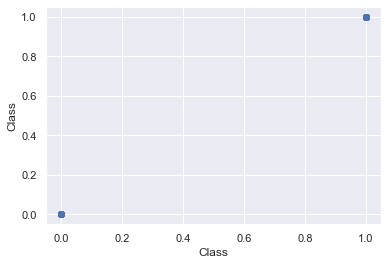

In [29]:
# Print the relationship between each column with Class (Detected Chronic Kidney Disease status)
for i in df.columns: 
    plt.scatter(df[i], df['Class'])
    plt.ylabel("Class")
    plt.xlabel(i)
    plt.show()

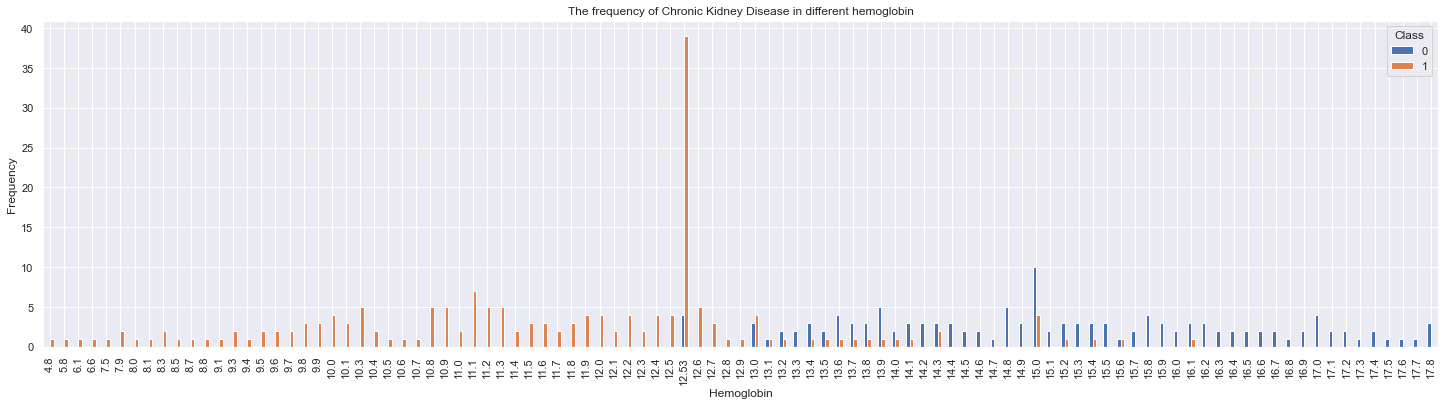

In [30]:
pd.crosstab(df['Hemo'],df['Class']).plot(kind="bar",figsize=(25,6))
plt.title('The frequency of Chronic Kidney Disease in different hemoglobin')
plt.xlabel('Hemoglobin')
plt.ylabel('Frequency')
plt.show()

The bar graph above depicts the number of people in this dataset who have been diagnosed with chronic kidney disease, with the x-axis categorised by their Hemoglobin body index (Hemo). Patients with a low haemoglobin range have a higher risk of getting chronic kidney disease; the low haemoglobin range is 4.8 to 13.0. As a result, we may deduce that those who want to prevent getting chronic kidney disease should keep their Hemo levels above a certain threshold. For example, as previously stated, the majority of chronic kidney disease cases have occurred in the low Hemo range.

### Data Modeling

###### Random Forest Classifier Algorithm

In [31]:
# Assign the independent and dependent column into different variable for splitting the dataset into training and testing dataset
X = df.drop(['Class'], axis=1)
y = df['Class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
# Display the confusion matrix of the random forest classifier algorithm
from sklearn.metrics import confusion_matrix
# Import library for calculating the accuracy score for the implemented algorithms
from sklearn.metrics import accuracy_score

# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=100,random_state=0)

# fit the model
rfc = rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format((accuracy_score(y_test, y_pred))*100))

Model accuracy score with 100 decision-trees : 100.0000


In [34]:
# Import the library for getting the matrix report
from sklearn.metrics import classification_report
# Print the classification report of random forest classifier algorithm
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        44

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



<AxesSubplot:>

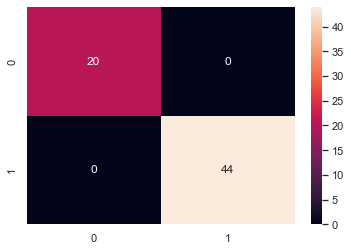

In [35]:
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot = True, fmt = "d")

Random Forest Classifier algorithm can provide a more influential method to do the decision because that clearly display the problem so all the options that have been displayed can be chosen and tried. That also allows the user to analyze and predict the fully possible and probability of a decision. Hence, there have chosen the random forest classifier to do the prediction because there can view the result more transparently. The generated confusion matrix shows that the Random Forest Classifier has correctly predicted a total of 64 records in this model. For the 0 and 1 in the x-axis can be considered as the actual cases of the patients are 'true' in disease and 'false' in disease; on the other hand, the 0 and 1 in the y-axis can be considered as the model predicting the patient not getting the disease and having the disease. For the instance from this generated confusion matrix, the model predicted 0 patients are '0' in having chronic kidney disease and the actual patient is not having the kidney disease so that was correctly predicted while 20 patients are correctly predicted do not have chronic kidney disease. Furthermore, the model predicted 0 patients are correct '0' in not having chronic kidney disease while 44 of patients were also correctly predicted having chronic kidney disease in the actual case. Based on the confusion matrix above, there have been inputted 64 samples into the Random Forest Classifier model. 64 of the data were predicted correctly while only 0 data were wrong predicted. Hence, the achieved accuracy by using Random Forest Classifier algorithm is 100.0000% which is only had a 0% error rate.

In [36]:
# Import the matplot library
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Initial feature_cols to store the independent feature's name
feature_cols = ['Al','Su','Rbc','Bu','Hemo','Rbcc','Htn']

# Plot a single tree from the Random Forest
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               feature_names = feature_cols, 
               class_names = True,
               filled = True);

The Random Forest Classifier model shown above includes 162 data samples (rows) for training purposes. Since our group created this Random Forest Classifier model, it is made up of 100 trees in order to attain a greater level of accuracy. Our group had just chosen the first treee from the list to demonstrate how to read and grasp this model for future use and decision-making by the decision maker. Furthermore, the Random Forest Classifier algorithm employs a large number of Decision Tree Classification models to carry out the prediction; after each tree's prediction result is generated, it is sent to the Random Forest, which combines the prediction accuracy to generate the overall and higher prediction accuracy of the Random Forest Classifier algorithm. For this first tree, the chance of not developing chronic kidney disease is higher than the probability of obtaining chronic kidney disease: 90/162 of the cases had a forecast of '0', whereas 72/162 of the examples had a prediction of '1'. Furthermore, the prediction accuracy for this tree has proved to be 100 percent, and there is no fail prediction for this tree. With 42 '0' examples and 0 '1' examples, the highest chance of not having chronic kidney disease is '0'. R1 is the decision rule for the highest probability of not getting CKD: if the Al is greater than 0.5 and the Bu is greater than 43.0, the outcome will be '0', as in 42 '0', indicating that the patient will not get chronic kidney disease if his body health index meets those criteria. R2 is the second greatest probability of not getting chronic kidney disease: if Al index is more than 0.5, Bu index is less than or equal to 43.0, and Rbcc is also less than or equal to 5.7, the outcome will be '0', with 21 '0' examples of people who do not get chronic kidney disease. As a result, the next decision rule may make use of the fundamentals of this decision tree that was chosen from the random forest classifier to comprehend and understand it.

###### Naive Bayes Classifier algorithm

In [37]:
# Select data for modeling
X_G=df[['Bu','Hemo','Rbcc']] # Gaussian, i.e. continuous
X_C=df[['Al','Su','Rbc','Htn']] # Categorical, i.e. discrete
y=df['Class'].values

In [38]:
from sklearn.preprocessing import OrdinalEncoder 
# Encode categorical variables
enc = OrdinalEncoder()
X_C = enc.fit_transform(X_C)

In [39]:
# Combine all four variables into one array
X1=np.c_[X_G, X_C[:,0].ravel(), X_C[:,1].ravel(), X_C[:,2].ravel(), X_C[:,3].ravel()]

In [40]:
# Create training and testing samples
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=100)

In [41]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
# ----- Fit the two models -----
# Now use the Gaussian model for continuous independent variable and 
model_G = GaussianNB()
clf_G = model_G.fit(X1_train[:,0:3], y1_train)
# Categorical model for discrete independent variable
model_C = CategoricalNB()
clf_C = model_C.fit(X1_train[:,3:7], y1_train)

In [42]:
# ----- Get probability predictions from each model -----
# On training data
G_train_probas = model_G.predict_proba(X1_train[:,0:3])
C_train_probas = model_C.predict_proba(X1_train[:,3:7])
# And on testing data
G_test_probas = model_G.predict_proba(X1_test[:,0:3])
C_test_probas = model_C.predict_proba(X1_test[:,3:7])

In [43]:
# Combine probability prediction for class=1 from both models into a 2D array
X_new_train = np.c_[(G_train_probas[:,1], C_train_probas[:,1])] # Train
X_new_test = np.c_[(G_test_probas[:,1], C_test_probas[:,1])] # Test

In [44]:
# ----- Fit Gaussian model on the X_new -----
model = GaussianNB()
clf = model.fit(X_new_train, y1_train)

In [45]:
# Predict class labels on a test data
pred_labels = model.predict(X_new_test)

In [46]:
# Predict class labels on a test data
pred_labels2 = model.predict(X_new_train)

In [47]:
# ----- Print results -----
print('Classes: ', clf.classes_) # class labels known to the classifier
print('Class Priors: ',clf.class_prior_) # probability of each class.
# Use score method to get accuracy of model
print('--------------------------------------------------------')
score = model.score(X_new_test, y1_test)
print('Accuracy Score: ', score*100)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y1_test, pred_labels))

Classes:  [0 1]
Class Priors:  [0.39920949 0.60079051]
--------------------------------------------------------
Accuracy Score:  93.75
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        30
           1       0.92      0.97      0.94        34

    accuracy                           0.94        64
   macro avg       0.94      0.94      0.94        64
weighted avg       0.94      0.94      0.94        64



<IPython.core.display.Javascript object>


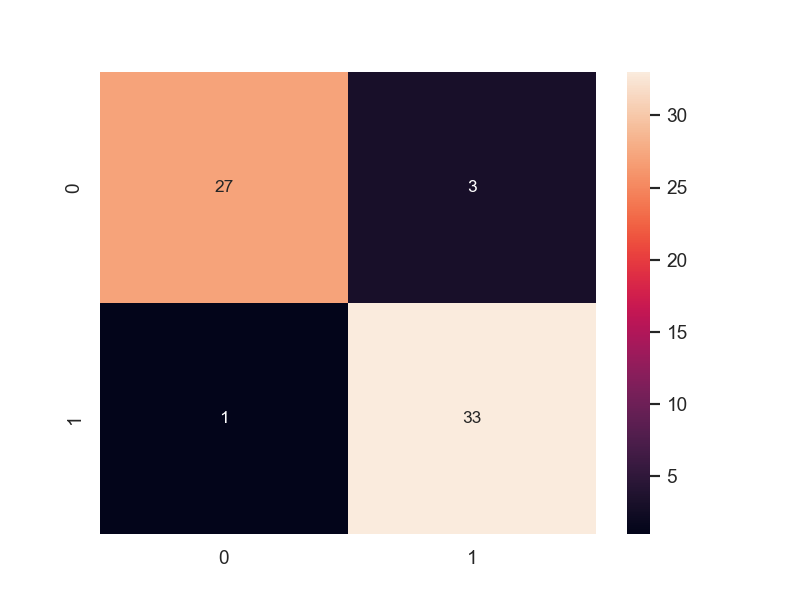

<AxesSubplot:>

In [54]:
cm= confusion_matrix(y1_test, pred_labels)
sns.heatmap(cm,annot = True, fmt = "d")

The Naive Bayes Classifier algorithm is also implemented in the classification prediction. The reason for using Naive Bayes Classification is because it is suitable for classifying high dimensionality of classification with multiple features inputted for the prediction. Naive Bayes Classification is using the probability of every dependent feature to predict a target variable for the outcomes. Since Naive Bayes Classifier is using different features probabilities and Bayes rules for the prediction model, users can be based on different information or conditions which include the numerical and nominal data implemented to the model to understand the possible outcomes from the model. As in FIgure x, the generated confusion matrix shows that the Naive Bayes Classifier has predicted a total of 64 records in this model. For the 0 and 1 in the x-axis can be considered as the actual cases of the patients are 'true' in disease and 'false' in disease; on the other hand, the 0 and 1 in the y-axis can be considered as the model predicting the patient not getting the disease and having the disease. For the instance from this generated confusion matrix, the model predicted 28 patients are not having chronic kidney disease ("0") but the actual data is 1 of the 28 patients having the kidney disease ("1") so that was only correctly predicted 27 patients that do not have chronic kidney disease ("0"). Furthermore, the model predicted 36 patients that are having chronic kidney disease ("1") but the actual data is 3 of the 36 patient does not have chronic kidney disease ("0"). Hence, only 33 patients were correctly predicted to have chronic kidney disease in the actual case ("1"). Based on the confusion matrix above, there have been inputted 64 samples into the Naive Bayes Classifier model. 60 of the data were predicted correctly while only 4 data were wrong predicted. Hence, the achieved accuracy by using the Naive Bayes Classifier algorithm is 93.75% which only has a 6.25% error rate.

###### ROC Curve

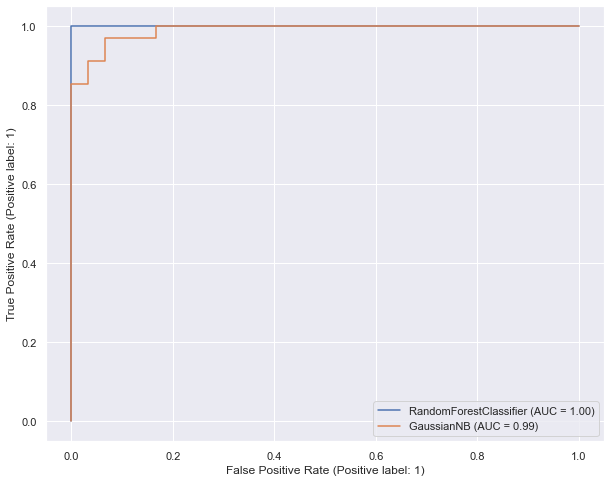

In [84]:
# Import the library
from sklearn.metrics import plot_roc_curve

# Set the plot size
fig, ax = plt.subplots(figsize = (10,8))

# Plot the roc curve for the implemented algorithm
plot_roc_curve(rfc,X_test,y_test, ax=ax)
plot_roc_curve(model,X_new_test, y1_test, ax=ax)

In this project, the Receiver Operating Characteristic (ROC) curve was presented above for comparing the ROC score using the Random Forest Classifier algorithm and Gaussian Naive Bayes algorithm. As seen in the graph above, the Random Forest Classifier algorithm obtained a better accuracy than the Gaussian Naive Bayes algorithm. The ROC curve is used to show the balance between sensitivity (or True Positive Rate (y-axis)) and specificity (1 - False Positive Rate (x-axis). ROC curves that are closer to the top-left corner have higher performance for the applied algorithm. The two generated ROC curves summarised the confusion matrix of each algorithm that had been executed; as a result, the ROC curves do not come to 45 degrees cater-cornered of the space of the ROC curve, and the given curves are also extremely close to the top-left corner of the ROC curves, and the ROC curve for the Random Forest Classifier algorithm is shown in becoming 90 degrees when it starts from 0 of false positive rate. The accuracy attained by employing these two classification algorithms may be regarded extremely accurate, and the prediction is dependable enough to be utilised for making a choice, as indicated by the ROC curve.

Furthermore, the ROC is a probability curve that plots the TPR against the FPR at various threshold values and crucially separates the'signal' from the 'noise.' As a result, the Area Under the Curve (AUC) may be used to assess each classification algorithm's performance and to summarise the ROC curve by computing the overall area under the ROC curve of the algorithm. AUC is the chance that a randomly chosen positive example will be ranked higher than a randomly chosen negative example. A classification algorithm with a high AUC can sometimes yield poorer accuracy than a classification algorithm with a lower AUC. However, in this project, there does not have this situation. When the algorithm has a greater AUC can be considered as the algorithm would get a high and reliable prediction accuracy. 

As a consequence of the ROC curves and AUC created by the supervised classification learning algorithm employed in this project, the Random Forest Classification algorithm received the greatest and most dependable prediction accuracy, as evidenced by its confusion matrix table, ROC curves, and AUC. As a result, the decision-maker may make a decision on their patient by utilizing the Random Forest Classification algorithm.

###### Evaluate Root Mean Squared Error for the Implemented Algorithm

In [85]:
# Import libraries for calculating the RMSE score
import math 
from sklearn.metrics import mean_squared_error 

# lculate the root mean squared error for the implemented algorithm
rmse_test_1 = math.sqrt(mean_squared_error(y_test,y_pred))
rmse_test_2 = math.sqrt(mean_squared_error(y_test,pred_labels))

In [86]:
# Store the root mean squared error in a dataframe 
rmse_df = pd.DataFrame()
rmse_df['Model'] = ['Random Forest','Naive Bayes']
rmse_df['Testing Prediction RMSE'] = [rmse_test_1,rmse_test_2]
rmse_df

Model  Testing Prediction RMSE
0  Random Forest                 0.000000
1    Naive Bayes                 0.661438

The RMSE score shows that the best performing model here too is the Random Forest Classifier algorithm. The Random Forest Classifier algorithm obtained a score of 0 in this prediction project that can be considered as the lowest value can be achieved in the RMSE. The meaning that can be carried out from this kind of lowest RMSE is highly correlated and considered the Random Forest Classifier as a good prediction model compared to the Naive Bayes model in this project. On the other hand, the RMSE for the Naive Bayes is 0.661438 can be also considered as a extremely low RMSE score but when it compares to Random Forest, it will be considered as have a lower performance as well.

Therefore, the best performing model for this project is the Random Forest Classifier algorithm. This model can be further used in the future for conducting the decision making or prediction. 